<a href="https://colab.research.google.com/github/SameerR007/Machine-Learning/blob/main/fashionmnsit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Implementing Artificial Neural Network(ANN) and Convolutional Neural Network(CNN) in fashionmnsit dataset

##Importing libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

##Loading the data

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist

In [ ]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

1. Training images is a set of 60000 images.

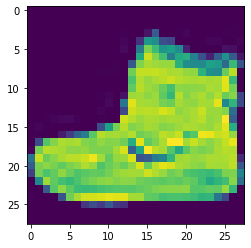

In [ ]:
plt.imshow(train_images[0].reshape(28,28))

In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

1. We can see each of the 60000 image is represented by 28 x 28 values ranging from 0 to 255 pixels

##Scaling features between 0 and 1

In [ ]:
train_images=train_images/255.0
test_images=test_images/255.0

In [ ]:
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
classes = ["tshirt","trousers","pullover","dress","coat","sandal","shirt","sneakers","bag","ankle boots"]

##Implementing Artificial Neural Network(ANN)

In [ ]:
from tensorflow.keras import datasets, layers, models

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(28,28,1)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(train_images,train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.6367 - accuracy: 0.7923
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4533 - accuracy: 0.8426
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4139 - accuracy: 0.8560
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3866 - accuracy: 0.8655
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3666 - accuracy: 0.8713


In [ ]:
ann.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3879 - accuracy: 0.8606


[0.38787922263145447, 0.8605999946594238]

1. By ANN we get an accuracy of 86.06%.

##Implementing Convolutional Neural Network(CNN)

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(train_images,train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4674 - accuracy: 0.8309
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3137 - accuracy: 0.8859
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2670 - accuracy: 0.9019
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2374 - accuracy: 0.9130
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2136 - accuracy: 0.9201


In [ ]:
cnn.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.2627 - accuracy: 0.9046


[0.2627398669719696, 0.9046000242233276]

1. We see by CNN we get even higher accuracy of 90.46 %.

In [ ]:
y_pred = cnn.predict(test_images)

In [ ]:
y_pred[:5]

array([[1.94241875e-06, 3.38946484e-06, 2.63491847e-06, 1.60018359e-07,
        9.37226297e-09, 4.36636474e-04, 1.76929007e-07, 6.53337361e-03,
        4.29102738e-06, 9.93017435e-01],
       [6.16803591e-05, 5.94627236e-10, 9.99921203e-01, 4.76510653e-09,
        1.33884823e-05, 4.48722969e-11, 3.71981582e-06, 1.64346293e-13,
        1.90022373e-10, 3.91298036e-11],
       [5.69019187e-09, 1.00000000e+00, 1.06669285e-09, 5.58122715e-10,
        6.46695336e-11, 2.77187155e-13, 1.50682511e-09, 1.73990758e-17,
        6.82222195e-11, 3.51136158e-16],
       [1.43670675e-09, 1.00000000e+00, 1.51324980e-10, 6.12282980e-09,
        1.11168522e-11, 1.25624619e-12, 3.00300207e-09, 3.54648460e-15,
        3.36637627e-11, 3.60633468e-15],
       [5.51142320e-02, 1.58579060e-05, 9.19018034e-03, 6.12061378e-03,
        1.72035433e-02, 1.09009225e-05, 9.12343800e-01, 8.90470417e-08,
        6.37428343e-07, 1.56051300e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[9, 2, 1, 1, 6]

In [ ]:
test_labels[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

We can match the actual test labels with predicted test labels and see that they both matches.

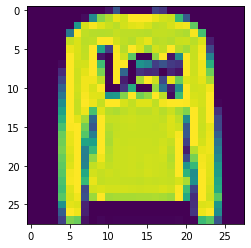

In [ ]:
plt.imshow(test_images[1].reshape(28,28))

In [ ]:
classes[y_classes[1]]

'pullover'

##Loading an image to be classified

In [ ]:
import cv2
img=cv2.imread('/content/sandal.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(190, 266)

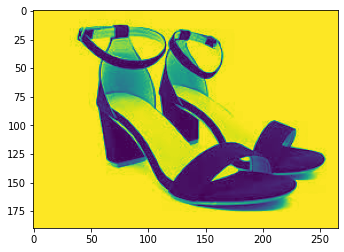

In [ ]:
plt.imshow(gray)

In [ ]:
gray2=cv2.resize(gray, (28, 28))
gray2=gray2/255
classes[np.argmax(cnn.predict(gray2.reshape(1,28,28,1)))]

'trousers'

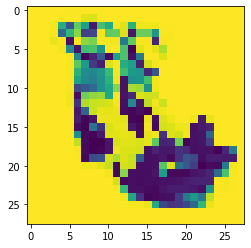

In [ ]:
plt.imshow(gray2)